In [1]:
# from google.colab import files, drive

In [2]:
# up = files.upload()

In [3]:
# drive.mount('/content/drive')

## import dataset

In [78]:
import pandas as pd
data = pd.read_csv('mnist_train_100.csv', header=None)
data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
# data.info()

In [84]:
print(data[0].unique())

[5 0 4 1 9 2 3 6 7 8]


## cleaning

In [9]:
# clean the data

## encoding

In [11]:
# encode the data

## define x, y

In [86]:
import numpy as np
x = data.iloc[:, 1:].values
print(x[:5])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [88]:
y = data.iloc[:, 0].values
print(y[:5])

[5 0 4 1 9]


##  spliting

In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [92]:
x_train.shape

(75, 784)

In [94]:
x_train[0].shape

(784,)

In [96]:
x_test.shape

(25, 784)

In [98]:
y_train.shape

(75,)

In [100]:
y_test.shape

(25,)

In [102]:
len(set(y_test))

10

## scaling

In [105]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler().fit(x_train)
x_train = mms.transform(x_train)
x_test = mms.transform(x_test)

## create, compile and fit the model

### Sequential

In [109]:
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

In [111]:
model = Sequential([
    Input(shape=x_train[0].shape),    # (11,)
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(30, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

In [113]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 30)                  │           1,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             310 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,090 (160.51 KB)

 Trainable params: 41,090 (160.51 KB)

 Non-trainable params: 0 (0.00 B)

In [115]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [117]:
r = model.fit(
    x_train, y_train,
    epochs=150,
    validation_data=(x_test, y_test)
)

Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 449ms/step - accuracy: 0.0568 - loss: 2.3306 - val_accuracy: 0.3600 - val_loss: 3.8943
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.1843 - loss: 2.2251 - val_accuracy: 0.2800 - val_loss: 3.8422
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.2333 - loss: 2.1361 - val_accuracy: 0.2000 - val_loss: 3.8116
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.2422 - loss: 2.0205 - val_accuracy: 0.2800 - val_loss: 3.7858
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4043 - loss: 1.9441 - val_accuracy: 0.3200 - val_loss: 3.7672
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.3441 - loss: 1.8819 - val_accuracy: 0.3600 - val_loss: 3.7371
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4282 - loss: 1.7627 - val_accuracy: 0.4400 - val_loss: 3.7091
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4548 - loss: 1.6585 - val_accuracy: 0.4400 - val_loss

### Functional API

In [119]:
# from tensorflow.keras.layers import Input, Dense, Dropout
# from tensorflow.keras.models import Model
# from tensorflow.keras import regularizers

In [120]:
# i = Input(shape=(784,))
# X = Dense(256, activation='relu')(i)
# X = Dense(128, activation='relu')(X)
# X = Dense(10, activation='softmax')(X)

# model = Model(i, X)

In [121]:
# model.summary()

## visualizing

In [126]:
import matplotlib.pyplot as plt

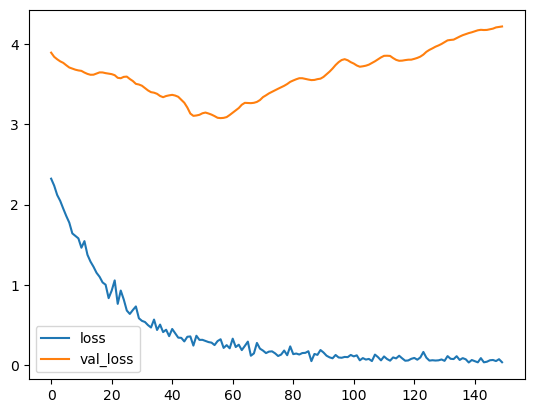

In [128]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

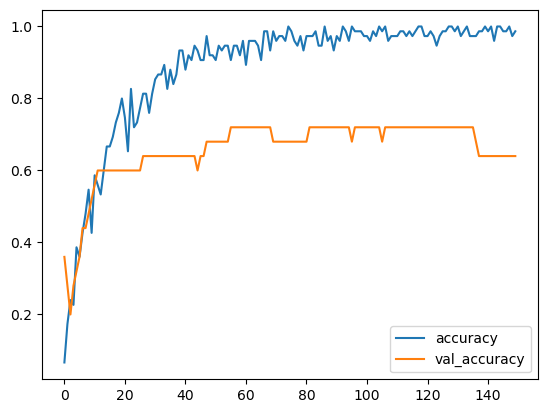

In [130]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

## predict new data

In [133]:
n = np.random.randint(len(x_test))

print(model.predict(x_test)[n])
print(np.argmax(model.predict(x_test)[n]))
print('-------------------')
print(y_test[n])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
[9.9984670e-01 6.4000244e-10 2.0233228e-06 1.1378688e-06 1.0544201e-06
 5.7210342e-10 1.4479492e-04 2.7726236e-08 3.5468129e-06 6.5265874e-07]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
0
-------------------
0


## save the model

In [43]:
# model.save('MLP_sparsecategorical.keras')

## load the model

In [45]:
# from tensorflow.keras.models import load_model
# model = load_model('MLP_sparsecategorical.keras')